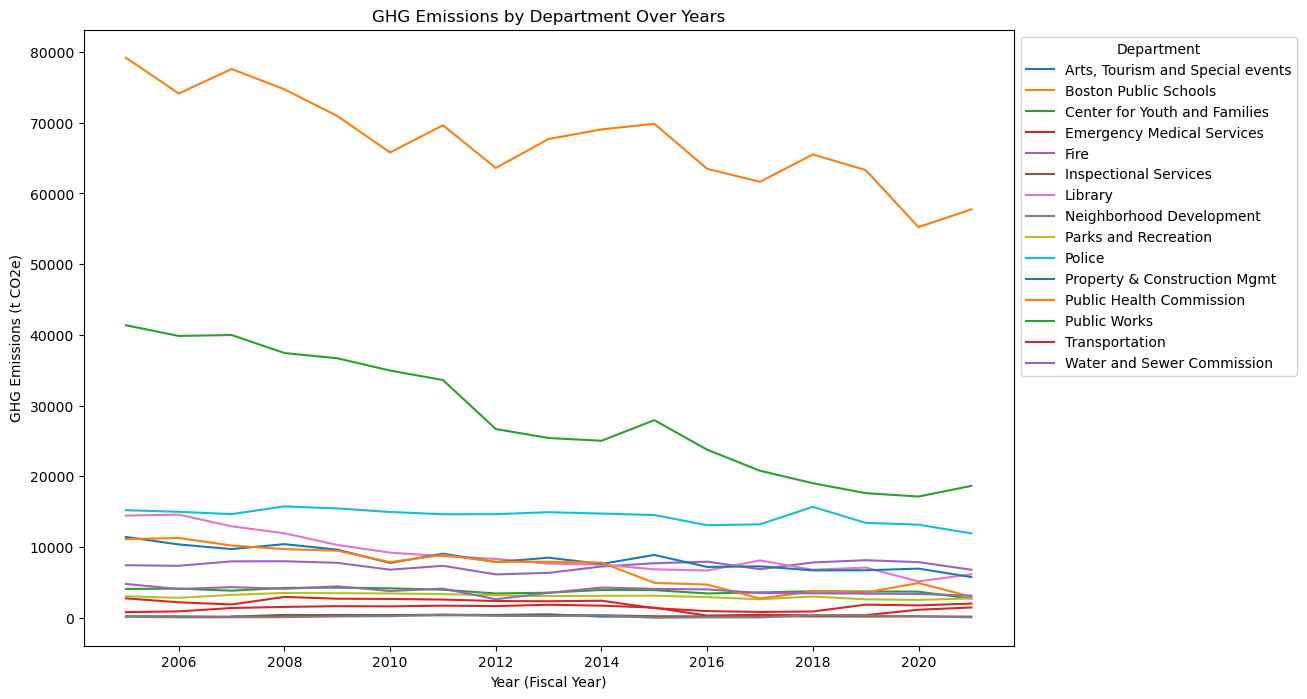

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
greenhouse_gas_df = pd.read_csv("data/rawData.csv")

# Filter out rows where 'GHG Emissions (t CO2e)' column has a hyphen "-"
# Convert 'GHG Emissions (t CO2e)' column to float after removing commas
greenhouse_gas_df = greenhouse_gas_df[greenhouse_gas_df['GHG Emissions (t CO2e)'] != "-"]
greenhouse_gas_df['GHG Emissions (t CO2e)'] = greenhouse_gas_df['GHG Emissions (t CO2e)'].str.replace(',', '').astype(float)

# Group the data by 'Department Longname' and 'Year (Fiscal Year)' and sum GHG Emissions
ghg_per_dept_year = greenhouse_gas_df.groupby(['Department Longname', 'Year (Fiscal Year)'])['GHG Emissions (t CO2e)'].sum().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Ensuring unique lines for each department
departments = ghg_per_dept_year['Department Longname'].unique()

for department in departments:
    dept_data = ghg_per_dept_year[ghg_per_dept_year['Department Longname'] == department]
    ax.plot(dept_data['Year (Fiscal Year)'], dept_data['GHG Emissions (t CO2e)'], label=department)

ax.set_title('GHG Emissions by Department Over Years')
ax.set_xlabel('Year (Fiscal Year)')
ax.set_ylabel('GHG Emissions (t CO2e)')
ax.legend(title='Department', loc='upper left', bbox_to_anchor=(1, 1))  # Position legend outside the plot

plt.show()